# Lab 1 - Python Review with Time Domain Filtering

Team Members: Cynthia Li, Simon Chen

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
import scipy.signal
from scipy import *
import copy
import pylab as pl
from scipy import signal
import time as t
from IPython import display

# 1) Implementing Discrete Time Filters to Filter Time-Series Data

In this part, we will be looking at various discrete time filters and how they are used to make more sense of time-series data. These are very common, basic and helpful operations that one encounters in anything related to signal processing.

## Implementing a Mean Filter

The time window size used was  41.0 ms


Text(0.5, 1.0, 'Noisy and Filtered Signal2')

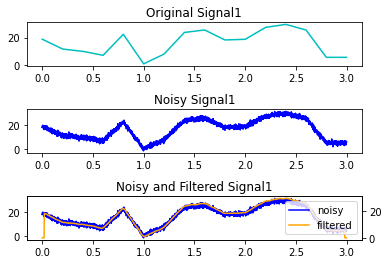

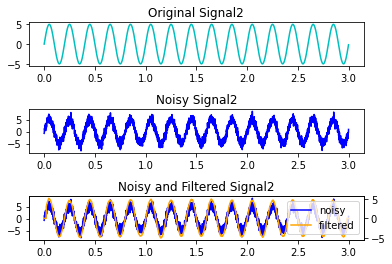

In [5]:
# choose relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,3,1/srate) # associated time vector that corresponds to 3 seconds
n     = len(time) # length of the time vector
p     = 15 # poles for random interpolation
pi = np.pi # value of pi
k     = 20 # number of points on other side of point of interest used for mean

# here are some base signals to work with
base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
base2 = 5*np.sin(2*pi*5*time)

# create some random noise to be added to the abve base signals
noise = np.random.normal(0,1,n)

# add noise to the base signals to create new noisy signals
signal1 = base1 + noise
signal2 = base2 + noise

# mean filter
filtsig1 = np.zeros(n) # initialize filtered signal vector for signal 1
filtsig2 = np.zeros(n) # initialize filtered signal vector for signal 2

for i in range(k,n-k+1):
    filtsig1[i]=np.mean(signal1[(i-k):(i+k+1)])
    filtsig2[i]=np.mean(signal2[(i-k):(i+k+1)])

# compute the time window size in ms and print it
windowsize = (2*k+1)*1/srate*1000
print("The time window size used was ",windowsize,"ms")

# Plots for singal 1:
fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(3,1,1)
plt.plot(time,base1,'c-')
plt.title("Original Signal1")

plt.subplot(3,1,2)
plt.plot(time,signal1,'b-')
plt.title("Noisy Signal1")

ax = plt.subplot(3,1,3)
line1 = ax.plot(time, signal1, '-b', label='noisy')
ax2 = ax.twinx()
line2=ax2.plot(time, filtsig1,'orange', label='filtered')
ln = line1+line2
label = [l.get_label() for l in ln]
ax2.legend(ln, label, loc='upper right')
plt.title("Noisy and Filtered Signal1")

# Plots for signal 2:
fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(3,1,1)
plt.plot(time,base2,'c-')
plt.title("Original Signal2")

plt.subplot(3,1,2)
plt.plot(time,signal2,'b-')
plt.title("Noisy Signal2")

ax = plt.subplot(3,1,3)
line1 = ax.plot(time, signal2, 'b-', label='noisy')
ax2 = ax.twinx()
line2 = ax2.plot(time, filtsig2,'orange', label='filtered')
ln = line1+line2
label = [l.get_label() for l in ln]
ax2.legend(ln, label, loc='upper right')
plt.title("Noisy and Filtered Signal2")

## Discussion

**Comment on how the results and plots change when you amplify the noise more and also change the value of k.**

If we amplify the noise more, the mean value is more affected by the flunctuation in noise magnitude, resulting in a less accurate(more likely distorted) filtered signal compared to the original.
If we set the value of k to a very small value, the filtered signal will be in a more similar shape as the noise since there are too few points to average the effect of noise out. If we let k be a larger factor, the effect of noise and the shape of the original are both "over-averaged" and would lose the shape characteristics of the original signal. Therefore, k=20 seems to be a relatively reasonable value.

**Mention and explain any ONE of many possible drawbacks of the mean filter in analysing noisy time-series?**
The existence of outliers in the noise can cause the mean to deviate largely from what is expected and result in a distorted shape.

## Implementing a Median Filter to Remove Spikes

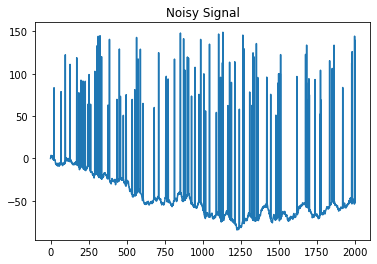

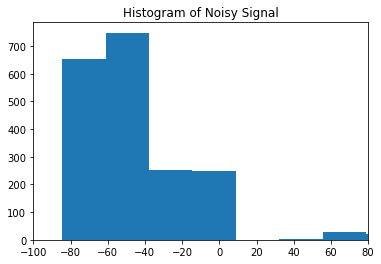

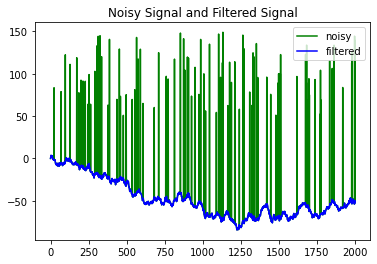

In [10]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100
fig3=plt.figure(3)
plt.plot(range(0,n),signal)
plt.title("Noisy Signal")

# use hist to pick threshold
fig4=plt.figure(4)
plt.hist(signal)
plt.xlim(-100,80)
plt.title("Histogram of Noisy Signal")

# visual-picked threshold
threshold = 50

# find indices of values above the threshold
suprathresh = np.where(signal>threshold)[0]

# initialize filtered signal
filtsig = copy.deepcopy(signal)
# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in range(0,len(suprathresh)): # actual median filter
    filtsig[suprathresh[ti]]=np.median(signal[(suprathresh[ti]-k):(suprathresh[ti]+k+1)])

# Plot the Filtered Signal on top of Noisy Signal
fig5,ax=plt.subplots()
ax.plot(signal,'-g', label='noisy')
ax.plot(filtsig,'-b', label='filtered')
plt.axis("equal")
plt.axis("tight")
plt.legend(loc="upper right")
plt.title("Noisy Signal and Filtered Signal")
plt.show()

## Discussion

**Compare the mean and median filters in terms of their uses and one advantage and disadvantage one has over the other.**

Mean filter can handle cases where there are no outliers well. When a k is carefully chosen, it does a decent job on every case, no matter what the noise or the base is. However, it can result in distorted shape of filtered signal when there is outliers or when the k is too big or too small.

Median filter can eliminate the effects of outliers pretty well and restore the shape of the original signal pretty well when the threshold is carefully chosen. However, it can be hard to set a "perfect" threshold to eliminate the noise. Almost for every signal and noise, there is a different "perfect threshold," it would take a lot of effort to manage threshold.

## Denoising an EMG signal

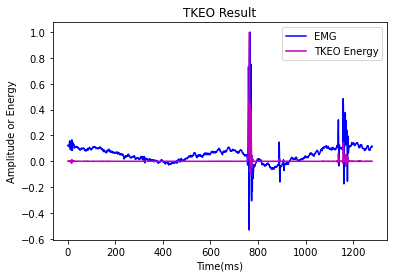

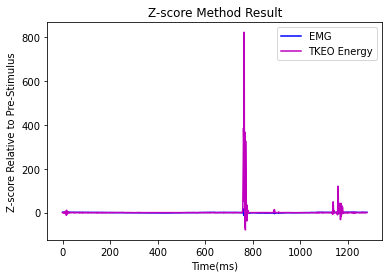

In [8]:
# import data
emgdata = scipy.io.loadmat('EMG.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]

# initialize filtered signal
emgf = copy.deepcopy(emg) # this is where the result of 
# the TKEO algorithm should be stored

# apply the TKEO algorithm
for i in range(1,len(emg)-1):
    emgf[i]=emg[i]**2-emg[i-1]*emg[i+1]

## convert both signals to zscore

# find timepoint zero
time0 = np.where(emgtime==0)[0][0]

# convert original EMG to z-score from time-zero
mean0_orig = np.mean(emg[0:time0])
std0_orig = np.std(emg[0:time0])
emgZ = (emg-mean0_orig)/std0_orig

# convert filtered EMG energy to z-score from time-zero
mean0_filt = np.mean(emgf[0:time0])
std0_filt = np.std(emgf[0:time0])
emgZf = (emgf-mean0_filt)/std0_filt


# Plot results of TKEO algorithm method
emg_tkeo = emg/np.max(emg)
emgf_tkeo = emgf/np.max(emgf)
fig6,ax=plt.subplots()
ax.plot(emg_tkeo,'-b', label='EMG')
ax.plot(emgf_tkeo,'-m', label='TKEO Energy')
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude or Energy")
plt.title("TKEO Result")
plt.axis("equal")
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()

# Plot results of Z-score method
fig7,ax=plt.subplots()
ax.plot(emgZ,'-b', label='EMG')
ax.plot(emgZf,'-m', label='TKEO Energy')
plt.xlabel("Time(ms)")
plt.ylabel("Z-score Relative to Pre-Stimulus")
plt.title("Z-score Method Result")
plt.axis("equal")
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()

## Discussion

**How would the other two filters implemented, i.e, the running mean and median filters fare against the TKEO method in analysing the EMG signal in this fashion?**

Neither mean nor median filter would perform as good as TKEO method. From the plot, we see that in EMG signal, triggering muscle is shown as a spike. Thus, the mean filter would average out the "spikes" and result in a slightly smoother shape in filtered signal then what we expect to see, while the median filter is going to take the spike as an outlier and eliminate it. Also, it would be hard to set a "just right" threshold for median filter as some muscle activity are not very obvious, such as the tiny spike on the left of the graph in "TKEO Result"plot. Therefore, both mean and median filter will result in compromised and unsatisfying filtered signal compared to TKEO, which can amplify the existence of spikes(the time when muscle is triggered) and smoothen the rest.


**If you had to use a running mean filter or a median filter to analyse the EMG signal to detect muscle activity, which one would you prefer and why?**

If I have no other choice besides these two filters, I would prefer mean filter to analyse the EMG signal. Mean filter would smoothen the spikes a bit by replacing it with an average value, but as long as k is carefully chosen, large spikes would still be much larger then the rest of the graph, and would thus be visible on the plot, though small spikes might be compromised. However, median filter would treat the spike as above threshold and eliminate it, which is against what we want to detect. Thus, I would prefer a mean filter.